In [51]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [52]:
# Step 1 - Load data & analyse it  

In [53]:
# Read data using pandas

data=pd.read_csv("C:/Users/kumar/OneDrive/Desktop/Data Science/Project Files/balance-scale.csv",names=['Class','Left-Weight','Left-Distance','Right-Weight','Right-Distance'])


In [54]:
data.head()

,Class,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [55]:
data.shape

(625, 5)

In [56]:
data.describe()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [57]:
# class distribution of target 
print(data.groupby('Class').size())

Class
B     49
L    288
R    288
dtype: int64


Class B-0.07 ; 
Class L=R=49% each

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           625 non-null    object
 1   Left-Weight     625 non-null    int64 
 2   Left-Distance   625 non-null    int64 
 3   Right-Weight    625 non-null    int64 
 4   Right-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [59]:
# Check datatypes of all columns values
data.dtypes

Class             object
Left-Weight        int64
Left-Distance      int64
Right-Weight       int64
Right-Distance     int64
dtype: object

In [60]:
# Checking for skewness; skewness not available in thsi dataset
data.skew()

Left-Weight       0.0
Left-Distance     0.0
Right-Weight      0.0
Right-Distance    0.0
dtype: float64

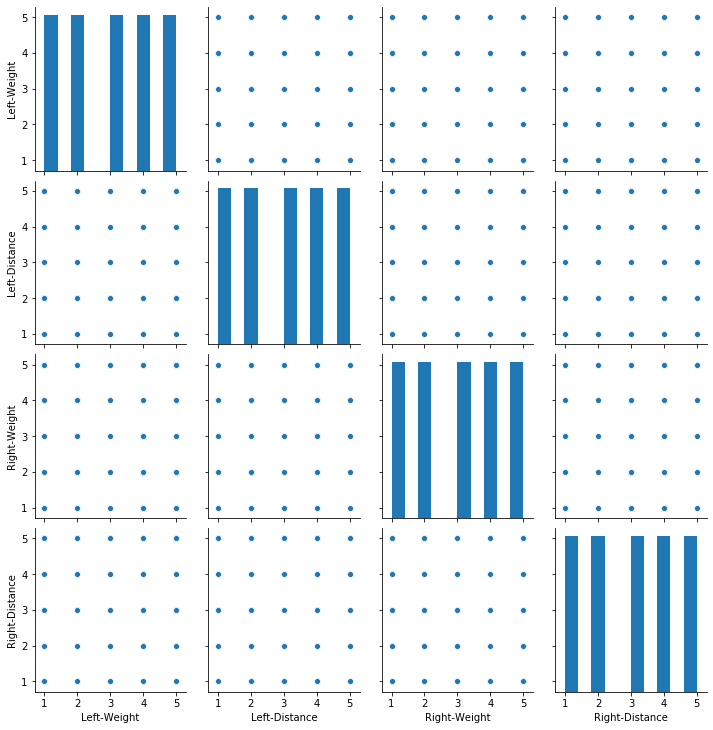

In [61]:
# Data Visualization - Univariate Plots
sns.pairplot(data)
plt.show()

In [63]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(625, 4)


In [64]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(625,)


In [65]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [66]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.8598726114649682


classification accuracy is 85%

In [68]:
# Checking for null accuracy
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

L    74
R    70
B    13
Name: Class, dtype: int64

In [70]:
# Apply Classification Models- SVM,SVC,KNN,Descision Tree

In [73]:
import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [74]:
# scoring parameters for classification
# scoring =[accuracy,f1,f1_micro,f1_macro,roc_auc]

sv=SVC()
score=cross_val_score(sv,X,y,cv=20,scoring='accuracy')
print('accuracy score=',score)
print ('mean scores',score.mean)
print('std',score.std())
y_pred = cross_val_predict(sv,X,y,cv=20)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score= [0.78125    0.78125    0.875      0.84375    0.84375    0.87096774
 0.87096774 0.90322581 0.90322581 0.93548387 0.93548387 0.93548387
 0.93548387 0.93548387 0.80645161 0.90322581 0.93548387 0.93548387
 0.87096774 0.93548387]
mean scores <built-in method mean of numpy.ndarray object at 0x0000018668A34BC0>
std 0.051529355261773525
Y prediction values
['L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'R'
 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'B'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 

0.8864

In [77]:
# Decision Tree Classifier (criterion='gini','entropy')

dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,X,y,cv=30,scoring='f1_macro')

print('f1_score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(dtc, X, y, cv=30)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

f1_score: [0.35128205 0.54166667 0.4021164  0.50196078 0.57738095 0.5962963
 0.47785548 0.46230159 0.45075758 0.53198653 0.51666667 0.6
 0.53376906 0.55833333 0.55555556 0.54191033 0.54497354 0.46230159
 0.59197012 0.63324979 0.59649123 0.51851852 0.50487329 0.5530303
 0.5962963  0.5745098  0.5462963  0.53529412 0.61578947 0.50980392]
mean score: 0.5327745858086416
stn deviation: 0.0620111161606238
Y prediction values
['B' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'B' 'R' 'B' 'B' 'R' 'L' 'B' 'R' 'R' 'R' 'B'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'B' 'B' 'L' 'B'
 'R' 'B' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'B' 'B' 'B' 'L' 'B' 'B' 'L' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R'
 'L' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'B' 'R' 'L' 'B' 'L'
 'L' 'B' 'L' 'R' 'L' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'B'
 'R' 'B' 'R' 'R' 'L' 'B' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R

array([[  1,  23,  25],
       [ 54, 219,  15],
       [ 49,  15, 224]], dtype=int64)

In [78]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,X,y,cv=30,scoring='accuracy')

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, X, y, cv=30)

print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

accuracy score: [0.76190476 0.76190476 0.66666667 0.71428571 0.71428571 0.80952381
 0.57142857 0.61904762 0.66666667 0.71428571 0.61904762 0.9047619
 0.71428571 0.76190476 0.85714286 0.71428571 0.76190476 0.71428571
 0.71428571 0.9047619  0.80952381 0.76190476 0.61904762 0.76190476
 0.80952381 0.8        0.7        0.65       0.9        0.85      ]
mean score: 0.7442857142857143
stn deviation: 0.08631973119717841
Y prediction values
['B' 'L' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'B' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'B'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'B'
 'R' 'B' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'L' 'L' 'B' 'R' 'B' 'L' 'L' 'L' 'R' 'R' 'B' 'L' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'B' 'L' 'L' 'L' 'L'
 'R' 'B' 'L' 'L' 'R' 'R' 'R' 'B' 'L' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'B'
 'L' 'L' 'L' 'R' 'L' 'B' 'R' 'R' 'R' 'B' 'R' 'R' 'R'

array([[  3,  23,  23],
       [ 34, 238,  16],
       [ 35,  29, 224]], dtype=int64)

In [79]:
svrbf=SVC(kernel='rbf') 
score=cross_val_score(svrbf,X,y,cv=20)
print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())
y_pred = cross_val_predict(svrbf, X, y, cv=20)
print('Y prediction values')
print(y_pred)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

accuracy score: [0.78125    0.78125    0.875      0.84375    0.84375    0.87096774
 0.87096774 0.90322581 0.90322581 0.93548387 0.93548387 0.93548387
 0.93548387 0.93548387 0.80645161 0.90322581 0.93548387 0.93548387
 0.87096774 0.93548387]
mean score: 0.8868951612903224
stn deviation: 0.051529355261773525
Y prediction values
['L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'R'
 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'B'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R

In [83]:
# Load libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [84]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    

LR: 0.865495 (0.028260)
LDA: 0.861286 (0.026706)
KNN: 0.831082 (0.041427)
CART: 0.745606 (0.056542)
NB: 0.899630 (0.021136)
SVM: 0.897502 (0.022651)


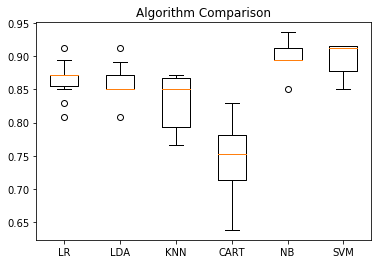

In [85]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [91]:
from sklearn.externals import joblib 

joblib_file = "joblib_svrbf.pkl"             # Save to file in the current working directory
joblib.dump(svrbf, joblib_file)
joblib_svrbf = joblib.load(joblib_file)      # Load from file

#score=cross_val_predict(svrbf_from_joblib,X,y,cv=5)
score=cross_val_score(svrbf,X,y,cv=20)
print(score)

[0.78125    0.78125    0.875      0.84375    0.84375    0.87096774
 0.87096774 0.90322581 0.90322581 0.93548387 0.93548387 0.93548387
 0.93548387 0.93548387 0.80645161 0.90322581 0.93548387 0.93548387
 0.87096774 0.93548387]


In [ ]:
Conclusion-
Model Support Vector & GaussianNB gives best mean score = 89.96,standard deviation = 0.02.
Support Vector & GaussianNB best fits for this dataset.